In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data =pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.shape

(10000, 14)

In [5]:
real_x =data.iloc[:,3:13]
real_y =data.iloc[:, 13]

In [6]:
#create dummy variable

In [7]:
data =data.drop(["Surname"],axis =1)

In [8]:
catagorical_feature = [feature for feature in data.columns if data[feature].dtype =='O']
catagorical_feature

['Geography', 'Gender']

In [9]:
for feature in catagorical_feature:
    print("the feature is {} and number of catagories are {}" .format(feature,len(data[feature].unique())))

the feature is Geography and number of catagories are 3
the feature is Gender and number of catagories are 2


In [10]:
geogrphy =pd.get_dummies(real_x["Geography"],drop_first =True)
gender =pd.get_dummies(real_x["Gender"],drop_first =True)

In [11]:
geogrphy

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [12]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [13]:
## Concatenate the Data Frames

In [14]:
real_x =pd.concat([real_x,geogrphy,gender],axis =1)

In [15]:
real_x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
## Drop Unnecessary columns
real_x =real_x.drop(["Geography","Gender"],axis =1)

In [17]:
real_x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(real_x,real_y)

ExtraTreesRegressor()

In [19]:
print(model.feature_importances_)

[0.11913158 0.2361833  0.10270965 0.12917128 0.14188151 0.03166684
 0.04761883 0.11760675 0.02812336 0.02195963 0.02394727]


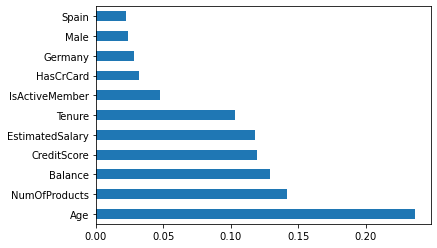

In [20]:
fear_importances =pd.Series(model.feature_importances_,index =real_x.columns)
fear_importances.nlargest(20).plot(kind="barh")
plt.show()

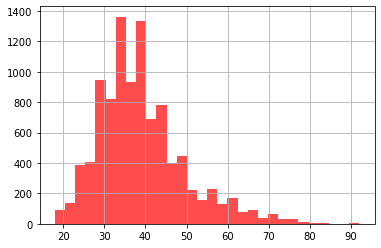

In [21]:
data['Age'].hist(bins =30,color ='red',alpha =0.7)

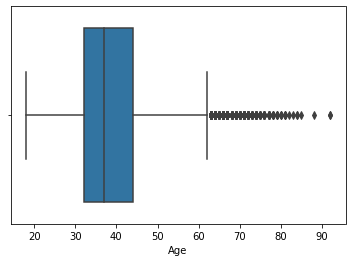

In [22]:
sns.boxplot(data["Age"])

In [23]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =train_test_split(real_x,real_y,test_size =0.2,random_state =0)

In [24]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
train_x =sc.fit_transform(train_x)
test_x =sc.fit_transform(test_x)

In [25]:
train_x.shape

(8000, 11)

In [26]:
#let make ANN

In [27]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [1]:
# Initialising the ANN
classifier =Sequentialc

NameError: name 'Sequentialc' is not defined

In [29]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer="he_uniform", activation = 'relu', input_dim = 11))
#adding the second hidden layer
classifier.add(Dense(6,kernel_initializer="he_uniform",activation ="relu"))
#adding the output layer
classifier.add(Dense(1,kernel_initializer ="glorot_uniform",activation ="sigmoid"))

In [31]:
classifier.summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [30]:
#compiling the ann
classifier.compile(optimizer ="Adamax",loss ="binary_crossentropy",metrics =["accuracy"])

In [86]:
#fitting the ann to the training set
model_history=classifier.fit(train_x,train_y,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.9052 - accuracy: 0.4243 - val_loss: 0.6931 - val_accuracy: 0.6460
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6061 - accuracy: 0.7361 - val_loss: 0.5546 - val_accuracy: 0.7743
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5280 - accuracy: 0.7899 - val_loss: 0.5163 - val_accuracy: 0.7944
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.7960 - val_loss: 0.5035 - val_accuracy: 0.7963
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4966 - accuracy: 0.7962 - val_loss: 0.4952 - val_accuracy: 0.7959
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4886 - accuracy: 0.7962 - val_loss: 0.4874 - val_accuracy: 0.7959
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4806 - accuracy: 0.7964 - val_loss: 0.4801 - val_accuracy: 0.7967

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8567 - val_loss: 0.3641 - val_accuracy: 0.8470
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8584 - val_loss: 0.3639 - val_accuracy: 0.8470
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3405 - accuracy: 0.8572 - val_loss: 0.3640 - val_accuracy: 0.8478
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8567 - val_loss: 0.3638 - val_accuracy: 0.8466
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8584 - val_loss: 0.3641 - val_accuracy: 0.8474
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8574 - val_loss: 0.3638 - val_accuracy: 0.8478
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8572 - val_loss: 0.3636 - val_accuracy:

In [39]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


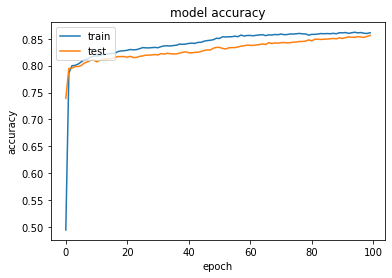

In [50]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

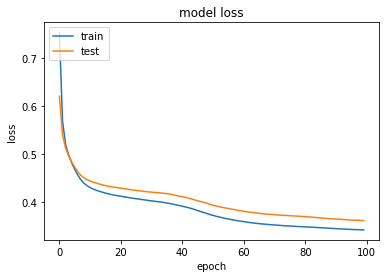

In [49]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
# Part 3 - Making the predictions and evaluating the model

In [51]:
pred_y =classifier.predict(test_x)
pred_y = (pred_y > 0.5)
pred_y

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y)
cm

array([[1540,   55],
       [ 225,  180]], dtype=int64)

In [48]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(pred_y,test_y)
score

0.86

In [75]:
#hyperparameter tunning 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid


In [82]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=train_x.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    

In [83]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [84]:
layers = [(20,), (45, 30), (40, 20)]  
activations = ['sigmoid', 'relu',"LeakyReLU"]
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256,100], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [85]:
grid_result =grid.fit(train_x,train_y)

c:\users\dellx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\dellx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\dellx\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "c:\users\dellx\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-82-1b960c72ff49>", line 6, in create_model
    model.add(Activation(ac

In [86]:
grid_result.best_score_,grid_result.best_params_

(0.8567499876022339,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (40, 20)})